In [126]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [127]:
#Importing of data
df = pd.read_csv("Fortune 1000 Companies by Revenue.csv")

In [128]:
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000"
...,...,...,...,...,...,...,...,...,...,...
995,996,Vizio Holding,"$2,124",4%,($39.40),-138.40%,$935.80,"$1,705.10",-,800
996,997,1-800-Flowers.com,"$2,122.20",42.50%,$118.70,101.10%,"$1,076.70",$830,-,"4,800"
997,998,Cowen,"$2,112.80",30.20%,$295.60,36.60%,"$8,748.80",$744.10,-,"1,534"
998,999,Ashland Global Holdings,"$2,111",-11.20%,$220,-,"$6,612","$5,601.90",-130,"4,100"


In [129]:
df.columns

Index(['rank ', 'name ', 'revenues ', 'revenue_percent_change', 'profits ',
       'profits_percent_change', 'assets', 'market_value ', 'change_in_rank',
       'employees '],
      dtype='object')

In [130]:
#Correcting of column names
df.rename(columns={'rank ': 'rank', 
                   'name ':'name', 
                   'revenues ': 'revenues',
                  'profits ': 'profits',
                  'market_value ': 'market_value',
                  'employees ': 'employees'}, inplace= True)
df.columns

Index(['rank', 'name', 'revenues', 'revenue_percent_change', 'profits',
       'profits_percent_change', 'assets', 'market_value', 'change_in_rank',
       'employees'],
      dtype='object')

In [131]:
#Cleaning of data, removal of '$', ',' and retaining of negative values
df[df.columns[2]] = df[df.columns[2]].replace('[\$,]', '', regex=True).astype(float)
df[df.columns[3]] = df[df.columns[3]].replace('[\$,\%]', '', regex=True).replace(r'-$', '0', regex=True).astype(float)
df[df.columns[4]] = df[df.columns[4]].replace('[\$,]', '', regex=True).replace(r'-$', '0', regex=True).replace(r'\((.*)\)', '-\\1', regex=True).astype(float)
df[df.columns[5]] = df[df.columns[5]].replace('[\$,\%]', '', regex=True).replace(r'-$', '0', regex=True).astype(float)
df[df.columns[6]] = df[df.columns[6]].replace('[\$,]', '', regex=True).replace(r'-$', '0', regex=True).astype(float)
df[df.columns[7]] = df[df.columns[7]].replace('[\$,]', '', regex=True).replace(r'-$', '0', regex=True).astype(float)
df[df.columns[8]] = df[df.columns[8]].replace(r'-$', '0', regex=True).astype(int)
df[df.columns[9]] = df[df.columns[9]].replace('[\$,]', '', regex=True).replace(r'-$', '0', regex=True).astype(int)

In [132]:
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,0,2300000
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,0,1608000
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,0,154000
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,0,258000
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,0,350000
...,...,...,...,...,...,...,...,...,...,...
995,996,Vizio Holding,2124.0,4.0,-39.4,-138.4,935.8,1705.1,0,800
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,0,4800
997,998,Cowen,2112.8,30.2,295.6,36.6,8748.8,744.1,0,1534
998,999,Ashland Global Holdings,2111.0,-11.2,220.0,0.0,6612.0,5601.9,-130,4100


Adjusting of Revenues, Profits, Assets, and Market Value into proper numerical unit (Multiplied by a **million**)

In [136]:
# df['revenues'] = df['revenues'].apply(lambda x: x*1000000)
# df['profits'] = df['profits'].apply(lambda x: x*1000000)
# df['assets'] = df['assets'].apply(lambda x: x*1000000)
# df['market_value'] = df['market_value'].apply(lambda x: x*1000000)
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,0,2300000
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,0,1608000
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,0,154000
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,0,258000
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,0,350000
...,...,...,...,...,...,...,...,...,...,...
995,996,Vizio Holding,2124.0,4.0,-39.4,-138.4,935.8,1705.1,0,800
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,0,4800
997,998,Cowen,2112.8,30.2,295.6,36.6,8748.8,744.1,0,1534
998,999,Ashland Global Holdings,2111.0,-11.2,220.0,0.0,6612.0,5601.9,-130,4100


In [140]:
df['margins'] = df['profits']/df['revenues']*100
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees,margins
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,0,2300000,2.387238
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,0,1608000,7.101413
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,0,154000,25.881793
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,0,258000,2.707875
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,0,350000,6.010146
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Vizio Holding,2124.0,4.0,-39.4,-138.4,935.8,1705.1,0,800,-1.854991
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,0,4800,5.593252
997,998,Cowen,2112.8,30.2,295.6,36.6,8748.8,744.1,0,1534,13.990913
998,999,Ashland Global Holdings,2111.0,-11.2,220.0,0.0,6612.0,5601.9,-130,4100,10.421601


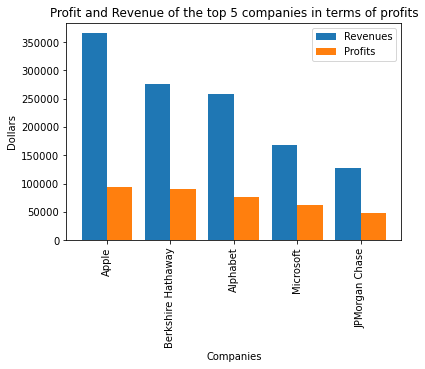

In [152]:
df = df.sort_values(by=['profits'], ascending=False)
numCompanies = 5
x_axis = np.arange(numCompanies)

plt.bar(x_axis - 0.2, df['revenues'].head(numCompanies), 0.4, label = 'Revenues')
plt.bar(x_axis + 0.2, df['profits'].head(numCompanies), 0.4, label = 'Profits')

plt.xticks(x_axis, df['name'].head(numCompanies), rotation=90)
plt.xlabel("Companies")
plt.ylabel("Dollars")
plt.title(f"Profit and Revenue of the top {numCompanies} companies in terms of profits")
plt.legend()
plt.show()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees,margins
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,0,154000,25.881793
6,7,Berkshire Hathaway,276094.0,12.5,89795.0,111.2,958784.0,779542.3,-1,372000,32.523343
7,8,Alphabet,257637.0,41.2,76033.0,88.8,359268.0,1842326.1,1,156500,29.511677
13,14,Microsoft,168088.0,17.5,61271.0,38.4,333779.0,2311358.9,1,181000,36.451740
23,24,JPMorgan Chase,127202.0,-1.8,48334.0,65.9,3743567.0,402526.9,-5,271025,37.997830
...,...,...,...,...,...,...,...,...,...,...,...
232,233,Cheniere Energy,15864.0,69.5,-2343.0,0.0,39258.0,35272.3,95,1550,-14.769289
59,60,Boeing,62286.0,7.1,-4202.0,0.0,138552.0,113058.7,-6,142000,-6.746299
913,914,WeWork,2570.1,-24.8,-4439.0,0.0,21756.2,4937.4,0,4400,-172.717015
8,9,McKesson,238228.0,3.1,-4539.0,-604.3,65015.0,45857.8,-2,67500,-1.905318
